In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [70]:
btc = pd.read_csv("BTC-USD.csv")
btc['Valor Promedio'] = (btc["Low"] + btc["High"])/2
btc = btc.groupby(pd.PeriodIndex(btc['Date'], freq="M"))['Valor Promedio'].mean().reset_index()
busquedas = pd.read_csv("Busquedas en google Blockchain.csv", parse_dates=["Semana"])
busquedas = busquedas.groupby(pd.PeriodIndex(busquedas['Semana'], freq="M"))['blockchain: (Todo el mundo)'].mean().reset_index()
data = btc.merge(busquedas, right_on='Semana', left_on='Date' , how='inner')
data["year"] = data["Semana"].dt.year
data = data.rename(columns={"blockchain: (Todo el mundo)": "Busquedas Blockchain", "B": "c"})
data = data.astype({'year':object})
data = data[['year',"Busquedas Blockchain",'Valor Promedio']]
data.head()


,year,Busquedas Blockchain,Valor Promedio
0,2018,100.00,13557.345215
1,2018,82.00,9003.379883
2,2018,75.75,9194.014892
3,2018,69.40,8136.095215
4,2018,69.75,8527.590088


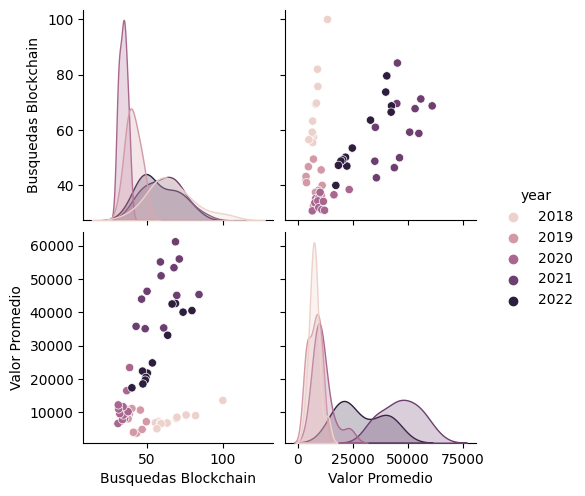

In [71]:
sns.pairplot(data,hue='year')

Text(0.5, 1.0, 'Valor de BTC vs Búsquedas de Google')

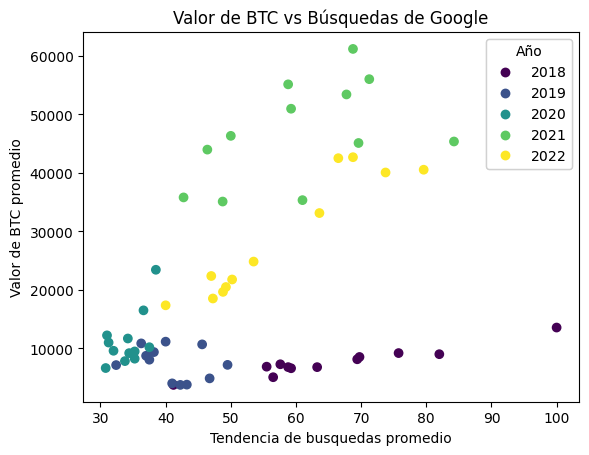

In [56]:
fig, ax = plt.subplots()
scatter = ax.scatter(data['Busquedas Blockchain'], data['Valor Promedio'],c=data["year"])
plt.xlabel("Tendencia de busquedas promedio")
plt.ylabel("Valor de BTC promedio")

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Año")
ax.add_artist(legend1)

plt.title("Valor de BTC vs Búsquedas de Google")

Vemos que en general existe una tendencia lineal entre busquedas de blockchain y el valor del bitcoin, en especial con el año 2018 y 2022. Generamos entonces un modelo de regression lineal multivariable

In [74]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['year']),
    remainder='passthrough')

transformed = transformer.fit_transform(data)
transformer.get_feature_names_out()

transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)
transformed_df

,onehotencoder__year_2018,onehotencoder__year_2019,onehotencoder__year_2020,onehotencoder__year_2021,onehotencoder__year_2022,remainder__Busquedas Blockchain,remainder__Valor Promedio
0,1.0,0.0,0.0,0.0,0.0,100.00,13557.345215
1,1.0,0.0,0.0,0.0,0.0,82.00,9003.379883
2,1.0,0.0,0.0,0.0,0.0,75.75,9194.014892
3,1.0,0.0,0.0,0.0,0.0,69.40,8136.095215
4,1.0,0.0,0.0,0.0,0.0,69.75,8527.590088
5,1.0,0.0,0.0,0.0,0.0,63.25,6790.650147
6,1.0,0.0,0.0,0.0,0.0,57.60,7280.344726
7,1.0,0.0,0.0,0.0,0.0,55.50,6870.044922
8,1.0,0.0,0.0,0.0,0.0,58.80,6792.975098
9,1.0,0.0,0.0,0.0,0.0,59.25,6600.765137


In [64]:
y = transformed_df["remainder__Valor Promedio"]
transformed_df = transformed_df.drop(columns="remainder__Valor Promedio")
x_train, x_test, y_train, y_test = train_test_split(transformed_df,
                                                    y, test_size=0.2, random_state=1234)
modelo = LinearRegression()
modelo.fit(x_train,y_train)

LinearRegression()

In [73]:
score = modelo.score(x_test, y_test)
y_pred = modelo.predict(x_test)
print("R-squared: ", score)
print("b: ", modelo.intercept_)
print("coeficientes: ", score)

modelo.coef_


R-squared:  0.9148387251341888
b:  1558.54351190546
coeficientes:  0.9148387251341888


array([-17590.40414455,  -8654.80485298,  -2481.43561756,  22531.06704872,
         6195.57756637,    353.57930774])